# Nashville Real Estate Investment Case Study

## Linear Regression, Decision Tree, Random Forest and Gradient Boost Modeling 
> ### Models Benchmarks Comparison
> ### Author: Lu (Christina) Jin

# Setup: Import all libraries

In [52]:
import os
import io
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.image as pltimg
import scipy as scipy

import statsmodels.api as smf       
from statsmodels.formula.api import ols, logit
import datetime
from datetime import datetime, date

import statsmodels.api as sm
from sklearn import datasets, linear_model
from sklearn import metrics
from sklearn import svm
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz 
#from dtreeviz.trees import dtreeviz
#from graphviz import pydot
from sklearn import ensemble
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from mpl_toolkits.mplot3d import Axes3D
from collections import Counter
from math import sqrt
from matplotlib.ticker import PercentFormatter
from scipy import stats
import statsmodels.api as smf
from statsmodels.formula.api import ols, logit
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import RandomForestClassifier
from pylab import rcParams
rcParams['figure.figsize'] = (20, 10)
sns.set_style('darkgrid')
plt.style.use('seaborn-darkgrid')

# Acquiring Dataset 

In [7]:
# Read data
housing_df = pd.read_csv (r'C:\Users\Lu_ki\OneDrive - Northeastern University\Data Analytics Case Study Projects\Jupyter Notebook\Data Input\Nashville_housing_data_2013_2016.csv')
len(housing_df)
housing_df

,Unnamed: 0,Unnamed: 0.1,Parcel ID,Land Use,Property Address,Suite/ Condo #,Property City,Sale Date,Sale Price,Legal Reference,...,Building Value,Total Value,Finished Area,Foundation Type,Year Built,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath
0,0,0,105 03 0D 008.00,RESIDENTIAL CONDO,1208 3RD AVE S,8,NASHVILLE,2013-01-24,132000,20130128-0008725,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,105 11 0 080.00,SINGLE FAMILY,1802 STEWART PL,NaN,NASHVILLE,2013-01-11,191500,20130118-0006337,...,134400.0,168300.0,1149.00000,PT BSMT,1941.0,BRICK,C,2.0,1.0,0.0
2,2,2,118 03 0 130.00,SINGLE FAMILY,2761 ROSEDALE PL,NaN,NASHVILLE,2013-01-18,202000,20130124-0008033,...,157800.0,191800.0,2090.82495,SLAB,2000.0,BRICK/FRAME,C,3.0,2.0,1.0
3,3,3,119 01 0 479.00,SINGLE FAMILY,224 PEACHTREE ST,NaN,NASHVILLE,2013-01-18,32000,20130128-0008863,...,243700.0,268700.0,2145.60001,FULL BSMT,1948.0,BRICK/FRAME,B,4.0,2.0,0.0
4,4,4,119 05 0 186.00,SINGLE FAMILY,316 LUTIE ST,NaN,NASHVILLE,2013-01-23,102000,20130131-0009929,...,138100.0,164800.0,1969.00000,CRAWL,1910.0,FRAME,C,2.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56631,56631,56631,093 13 0B 274.00,RESIDENTIAL CONDO,320 11TH AVE S,274.0,NASHVILLE,2016-10-06,210000,20161007-0106599,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56632,56632,56632,093 13 0D 044.00,RESIDENTIAL CONDO,700 12TH AVE S,608.0,NASHVILLE,2016-10-25,338000,20161101-0115186,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56633,56633,56633,093 13 0D 048.00,RESIDENTIAL CONDO,700 12TH AVE S,613.0,NASHVILLE,2016-10-04,742000,20161010-0106889,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56634,56634,56634,093 13 0D 056.00,RESIDENTIAL CONDO,700 12TH AVE S,708.0,NASHVILLE,2016-10-26,320000,20161031-0114730,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Part 1: Data Cleansing, EDA and Data Manipulation 

In [8]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56636 entries, 0 to 56635
Data columns (total 31 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         56636 non-null  int64  
 1   Unnamed: 0.1                       56636 non-null  int64  
 2   Parcel ID                          56636 non-null  object 
 3   Land Use                           56636 non-null  object 
 4   Property Address                   56477 non-null  object 
 5   Suite/ Condo   #                   6109 non-null   object 
 6   Property City                      56477 non-null  object 
 7   Sale Date                          56636 non-null  object 
 8   Sale Price                         56636 non-null  int64  
 9   Legal Reference                    56636 non-null  object 
 10  Sold As Vacant                     56636 non-null  object 
 11  Multiple Parcels Involved in Sale  56636 non-null  obj

In [9]:
housing_df.describe()

,Unnamed: 0,Unnamed: 0.1,Sale Price,Acreage,Neighborhood,Land Value,Building Value,Total Value,Finished Area,Year Built,Bedrooms,Full Bath,Half Bath
count,56636.00000,56636.00000,5.663600e+04,26017.000000,26017.000000,2.601700e+04,2.601700e+04,2.601700e+04,24166.000000,24165.000000,24159.000000,24277.000000,24146.000000
mean,28317.50000,28317.50000,3.272111e+05,0.498903,4356.215782,6.907267e+04,1.608025e+05,2.323971e+05,1926.954345,1963.749224,3.090029,1.886106,0.283981
std,16349.54926,16349.54926,9.287425e+05,1.570396,2170.348270,1.060405e+05,2.068041e+05,2.810703e+05,1687.017313,26.546141,0.852942,0.961572,0.487905
min,0.00000,0.00000,5.000000e+01,0.010000,107.000000,1.000000e+02,0.000000e+00,1.000000e+02,0.000000,1799.000000,0.000000,0.000000,0.000000
25%,14158.75000,14158.75000,1.350000e+05,0.180000,3126.000000,2.100000e+04,7.590000e+04,1.028000e+05,1239.000000,1948.000000,3.000000,1.000000,0.000000
50%,28317.50000,28317.50000,2.054500e+05,0.270000,3929.000000,2.880000e+04,1.114000e+05,1.485000e+05,1632.000000,1960.000000,3.000000,2.000000,0.000000
75%,42476.25000,42476.25000,3.290000e+05,0.450000,6228.000000,6.000000e+04,1.807000e+05,2.685000e+05,2212.000000,1983.000000,3.000000,2.000000,1.000000
max,56635.00000,56635.00000,5.427806e+07,160.060000,9530.000000,2.772000e+06,1.297180e+07,1.394040e+07,197988.000000,2017.000000,11.000000,10.000000,3.000000


In [10]:
housing_df.iloc[:, :16]

,Unnamed: 0,Unnamed: 0.1,Parcel ID,Land Use,Property Address,Suite/ Condo #,Property City,Sale Date,Sale Price,Legal Reference,Sold As Vacant,Multiple Parcels Involved in Sale,Owner Name,Address,City,State
0,0,0,105 03 0D 008.00,RESIDENTIAL CONDO,1208 3RD AVE S,8,NASHVILLE,2013-01-24,132000,20130128-0008725,No,No,NaN,NaN,NaN,NaN
1,1,1,105 11 0 080.00,SINGLE FAMILY,1802 STEWART PL,NaN,NASHVILLE,2013-01-11,191500,20130118-0006337,No,No,"STINSON, LAURA M.",1802 STEWART PL,NASHVILLE,TN
2,2,2,118 03 0 130.00,SINGLE FAMILY,2761 ROSEDALE PL,NaN,NASHVILLE,2013-01-18,202000,20130124-0008033,No,No,"NUNES, JARED R.",2761 ROSEDALE PL,NASHVILLE,TN
3,3,3,119 01 0 479.00,SINGLE FAMILY,224 PEACHTREE ST,NaN,NASHVILLE,2013-01-18,32000,20130128-0008863,No,No,"WHITFORD, KAREN",224 PEACHTREE ST,NASHVILLE,TN
4,4,4,119 05 0 186.00,SINGLE FAMILY,316 LUTIE ST,NaN,NASHVILLE,2013-01-23,102000,20130131-0009929,No,No,"HENDERSON, JAMES P. & LYNN P.",316 LUTIE ST,NASHVILLE,TN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56631,56631,56631,093 13 0B 274.00,RESIDENTIAL CONDO,320 11TH AVE S,274.0,NASHVILLE,2016-10-06,210000,20161007-0106599,No,No,NaN,NaN,NaN,NaN
56632,56632,56632,093 13 0D 044.00,RESIDENTIAL CONDO,700 12TH AVE S,608.0,NASHVILLE,2016-10-25,338000,20161101-0115186,No,No,NaN,NaN,NaN,NaN
56633,56633,56633,093 13 0D 048.00,RESIDENTIAL CONDO,700 12TH AVE S,613.0,NASHVILLE,2016-10-04,742000,20161010-0106889,No,No,NaN,NaN,NaN,NaN
56634,56634,56634,093 13 0D 056.00,RESIDENTIAL CONDO,700 12TH AVE S,708.0,NASHVILLE,2016-10-26,320000,20161031-0114730,No,No,NaN,NaN,NaN,NaN


In [11]:
housing_df.iloc[:, 16:]

,Acreage,Tax District,Neighborhood,image,Land Value,Building Value,Total Value,Finished Area,Foundation Type,Year Built,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.17,URBAN SERVICES DISTRICT,3127.0,\114000\910001.JPG,32000.0,134400.0,168300.0,1149.00000,PT BSMT,1941.0,BRICK,C,2.0,1.0,0.0
2,0.11,CITY OF BERRY HILL,9126.0,\131000\191001.JPG,34000.0,157800.0,191800.0,2090.82495,SLAB,2000.0,BRICK/FRAME,C,3.0,2.0,1.0
3,0.17,URBAN SERVICES DISTRICT,3130.0,\133000\721001.JPG,25000.0,243700.0,268700.0,2145.60001,FULL BSMT,1948.0,BRICK/FRAME,B,4.0,2.0,0.0
4,0.34,URBAN SERVICES DISTRICT,3130.0,\134000\474001.JPG,25000.0,138100.0,164800.0,1969.00000,CRAWL,1910.0,FRAME,C,2.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56631,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56632,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56633,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56634,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Basic Data Cleansing

In [12]:
# drop irrelavent columns
housing_df.drop(['Unnamed: 0', 'Unnamed: 0.1','Parcel ID','Suite/ Condo   #','Property City','Property Address','Legal Reference','Owner Name','Address','City','State','Neighborhood','image'], axis = 1, inplace=True)
housing_df.head()

,Land Use,Sale Date,Sale Price,Sold As Vacant,Multiple Parcels Involved in Sale,Acreage,Tax District,Land Value,Building Value,Total Value,Finished Area,Foundation Type,Year Built,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath
0,RESIDENTIAL CONDO,2013-01-24,132000,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,SINGLE FAMILY,2013-01-11,191500,No,No,0.17,URBAN SERVICES DISTRICT,32000.0,134400.0,168300.0,1149.00000,PT BSMT,1941.0,BRICK,C,2.0,1.0,0.0
2,SINGLE FAMILY,2013-01-18,202000,No,No,0.11,CITY OF BERRY HILL,34000.0,157800.0,191800.0,2090.82495,SLAB,2000.0,BRICK/FRAME,C,3.0,2.0,1.0
3,SINGLE FAMILY,2013-01-18,32000,No,No,0.17,URBAN SERVICES DISTRICT,25000.0,243700.0,268700.0,2145.60001,FULL BSMT,1948.0,BRICK/FRAME,B,4.0,2.0,0.0
4,SINGLE FAMILY,2013-01-23,102000,No,No,0.34,URBAN SERVICES DISTRICT,25000.0,138100.0,164800.0,1969.00000,CRAWL,1910.0,FRAME,C,2.0,1.0,0.0


In [13]:
housing_df['Land Use'].unique()

array(['RESIDENTIAL CONDO', 'SINGLE FAMILY', 'VACANT RES LAND', 'DUPLEX',
       'CONDO', 'ZERO LOT LINE', 'RESIDENTIAL COMBO/MISC', 'TRIPLEX',
       'CHURCH', 'QUADPLEX', 'VACANT COMMERCIAL LAND',
       'CONDOMINIUM OFC  OR OTHER COM CONDO', 'STRIP SHOPPING CENTER',
       'VACANT RURAL LAND', 'DORMITORY/BOARDING HOUSE', 'MOBILE HOME',
       'PARSONAGE', 'SPLIT CLASS', 'GREENBELT',
       'VACANT ZONED MULTI FAMILY', 'PARKING LOT',
       'OFFICE BLDG (ONE OR TWO STORIES)', 'VACANT RESIDENTIAL LAND',
       'RESTURANT/CAFETERIA', 'FOREST', 'CONVENIENCE MARKET WITHOUT GAS',
       'CLUB/UNION HALL/LODGE', 'LIGHT MANUFACTURING',
       'ONE STORY GENERAL RETAIL STORE', 'DAY CARE CENTER',
       'GREENBELT/RES\r\nGRRENBELT/RES',
       'APARTMENT: LOW RISE (BUILT SINCE 1960)', 'VACANT RESIENTIAL LAND',
       'SMALL SERVICE SHOP', 'TERMINAL/DISTRIBUTION WAREHOUSE',
       'NON-PROFIT CHARITABLE SERVICE',
       'METRO OTHER THAN OFC, SCHOOL,HOSP, OR PARK', 'NIGHTCLUB/LOUNGE',
       '

In [14]:
print(housing_df['Tax District'].unique())
print(housing_df['Foundation Type'].unique())
print(housing_df['Exterior Wall'].unique())
print(housing_df['Grade'].unique())

[nan 'URBAN SERVICES DISTRICT' 'CITY OF BERRY HILL'
 'GENERAL SERVICES DISTRICT' 'CITY OF BELLE MEADE' 'CITY OF OAK HILL'
 'CITY OF FOREST HILLS' 'CITY OF GOODLETTSVILLE']
[nan 'PT BSMT' 'SLAB' 'FULL BSMT' 'CRAWL' 'PIERS' 'TYPICAL']
[nan 'BRICK' 'BRICK/FRAME' 'FRAME' 'FRAME/STONE' 'STONE' 'STUCCO'
 'CONC BLK' 'PRECAST CONC' 'LOG' 'METAL']
[nan 'C   ' 'B   ' 'D   ' 'A   ' 'X   ' 'TAC ' 'TCC ' 'E   ' 'SSC ' 'SRC '
 'AAC ' 'OFC ' 'AAB ' 'SRD ' 'TFC ' 'TCB ' 'IDC ' 'OMB ' 'OFB ' 'TCD ']


In [15]:
housing_df.drop(['Land Use'], axis = 1, inplace=True)

# check for null values
housing_df.isnull().sum()

Sale Date                                0
Sale Price                               0
Sold As Vacant                           0
Multiple Parcels Involved in Sale        0
Acreage                              30619
Tax District                         30619
Land Value                           30619
Building Value                       30619
Total Value                          30619
Finished Area                        32470
Foundation Type                      32472
Year Built                           32471
Exterior Wall                        32471
Grade                                32471
Bedrooms                             32477
Full Bath                            32359
Half Bath                            32490
dtype: int64

>**We've observed more than 30,000 null inputs of each of the columns in the dataset besides 4 columns. Due to the fact that we really couldn't do much with the missing values, thus, I've decided to remove them.**

In [16]:
housing_df = housing_df.dropna()
housing_df

,Sale Date,Sale Price,Sold As Vacant,Multiple Parcels Involved in Sale,Acreage,Tax District,Land Value,Building Value,Total Value,Finished Area,Foundation Type,Year Built,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath
1,2013-01-11,191500,No,No,0.17,URBAN SERVICES DISTRICT,32000.0,134400.0,168300.0,1149.00000,PT BSMT,1941.0,BRICK,C,2.0,1.0,0.0
2,2013-01-18,202000,No,No,0.11,CITY OF BERRY HILL,34000.0,157800.0,191800.0,2090.82495,SLAB,2000.0,BRICK/FRAME,C,3.0,2.0,1.0
3,2013-01-18,32000,No,No,0.17,URBAN SERVICES DISTRICT,25000.0,243700.0,268700.0,2145.60001,FULL BSMT,1948.0,BRICK/FRAME,B,4.0,2.0,0.0
4,2013-01-23,102000,No,No,0.34,URBAN SERVICES DISTRICT,25000.0,138100.0,164800.0,1969.00000,CRAWL,1910.0,FRAME,C,2.0,1.0,0.0
5,2013-01-04,93736,No,No,0.17,URBAN SERVICES DISTRICT,25000.0,86100.0,113300.0,1037.00000,CRAWL,1945.0,FRAME,C,2.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56605,2016-10-26,214000,No,No,0.27,URBAN SERVICES DISTRICT,25000.0,142400.0,167400.0,2421.00000,SLAB,1996.0,BRICK/FRAME,C,3.0,3.0,0.0
56607,2016-10-28,236000,No,No,0.23,URBAN SERVICES DISTRICT,25000.0,159300.0,184300.0,3117.00000,SLAB,1995.0,BRICK/FRAME,C,3.0,3.0,0.0
56614,2016-10-28,466000,No,No,0.15,URBAN SERVICES DISTRICT,40000.0,204100.0,256000.0,1637.00000,CRAWL,2004.0,FRAME,B,3.0,2.0,1.0
56615,2016-10-26,685000,No,No,0.19,URBAN SERVICES DISTRICT,40000.0,295900.0,351600.0,2478.00000,CRAWL,2005.0,FRAME,B,4.0,3.0,1.0


In [17]:
housing_df.columns = ['sale_date','sale_price','vacant','multiple_parcels','acreage','tax_district','land_value','building_value','total_value','finished_area','foundation_type','year_built','exterior_wall','grade','bedrooms','full_bath','half_bath']

>**Next step, we are going to perform some exploratory analysis and seeking for further cleansing and processing.**

## Outlier Detection and Removel

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24013 entries, 1 to 56616
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sale_price      24013 non-null  int64  
 1   acreage         24013 non-null  float64
 2   land_value      24013 non-null  float64
 3   building_value  24013 non-null  float64
 4   total_value     24013 non-null  float64
 5   finished_area   24013 non-null  float64
dtypes: float64(5), int64(1)
memory usage: 1.3 MB


sale_price           AxesSubplot(0.125,0.536818;0.227941x0.343182)
acreage           AxesSubplot(0.398529,0.536818;0.227941x0.343182)
land_value        AxesSubplot(0.672059,0.536818;0.227941x0.343182)
building_value          AxesSubplot(0.125,0.125;0.227941x0.343182)
total_value          AxesSubplot(0.398529,0.125;0.227941x0.343182)
finished_area        AxesSubplot(0.672059,0.125;0.227941x0.343182)
dtype: object

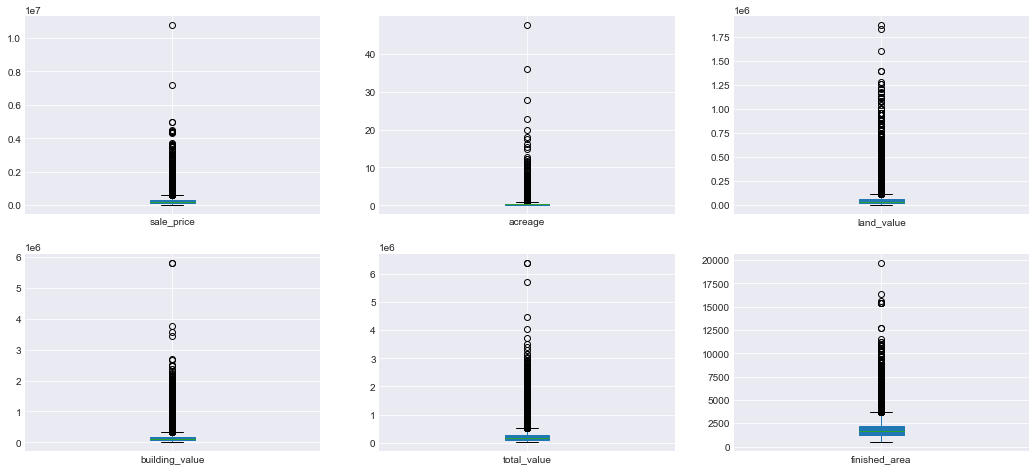

In [18]:
# select columns to explore
outlier_detect = housing_df[['sale_price','acreage','land_value','building_value','total_value','finished_area']]
outlier_detect.info()

# plot box plots
outlier_detect.plot(subplots=True, layout=(2,3), kind='box', figsize=(18,8), patch_artist=True)

>**We observed that all these six variables are highly skewed and with some outliers. So I'm going to remove these outliers to obtain a cleaner dataset.**

In [19]:
df_filtered = housing_df[housing_df['sale_price'] < 6000000]
df_filtered2 = df_filtered[df_filtered['acreage'] < 40]
df_filtered3 = df_filtered2[df_filtered2['land_value'] < 1750000]
df_filtered4 = df_filtered3[df_filtered3['building_value'] < 5000000]
df_filtered5 = df_filtered4[df_filtered4['total_value'] < 12000000]
df_filtered6 = df_filtered5[df_filtered5['finished_area'] < 200000]

housing_clean = df_filtered6
housing_clean.describe()

,sale_price,acreage,land_value,building_value,total_value,finished_area,year_built,bedrooms,full_bath,half_bath
count,2.400700e+04,24007.000000,2.400700e+04,2.400700e+04,2.400700e+04,24007.000000,24007.000000,24007.000000,24007.00000,24007.000000
mean,2.740218e+05,0.451525,6.874958e+04,1.716265e+05,2.430187e+05,1913.184390,1963.655559,3.090724,1.89199,0.285375
std,2.914645e+05,0.725870,1.005056e+05,1.841697e+05,2.624048e+05,1094.599508,26.437643,0.851568,0.95266,0.488555
min,1.000000e+02,0.040000,1.000000e+02,1.400000e+03,1.260000e+04,450.000000,1799.000000,0.000000,0.00000,0.000000
25%,1.250000e+05,0.190000,2.185000e+04,8.350000e+04,1.094000e+05,1236.000000,1948.000000,3.000000,1.00000,0.000000
50%,1.850000e+05,0.270000,2.990000e+04,1.171000e+05,1.542000e+05,1629.000000,1960.000000,3.000000,2.00000,0.000000
75%,3.249000e+05,0.450000,6.030000e+04,1.885000e+05,2.777000e+05,2210.640010,1983.000000,3.000000,2.00000,1.000000
max,5.000000e+06,35.970000,1.603800e+06,3.563100e+06,4.455200e+06,19728.249880,2017.000000,11.000000,10.00000,3.000000


sale_price           AxesSubplot(0.125,0.536818;0.227941x0.343182)
acreage           AxesSubplot(0.398529,0.536818;0.227941x0.343182)
land_value        AxesSubplot(0.672059,0.536818;0.227941x0.343182)
building_value          AxesSubplot(0.125,0.125;0.227941x0.343182)
total_value          AxesSubplot(0.398529,0.125;0.227941x0.343182)
finished_area        AxesSubplot(0.672059,0.125;0.227941x0.343182)
dtype: object

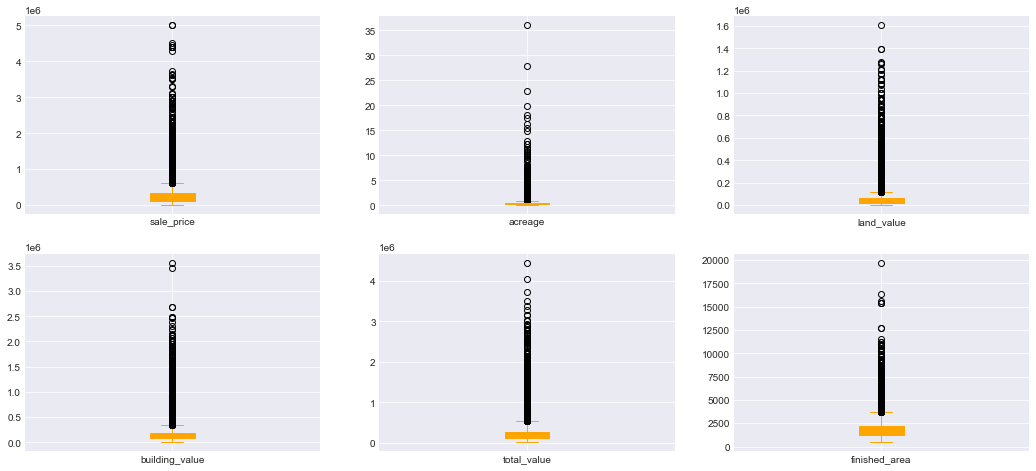

In [20]:
# confirm cleansed outliers with box plots again
outlier_detect = housing_clean[['sale_price','acreage','land_value','building_value','total_value','finished_area']]

outlier_detect.plot(subplots=True, layout=(2,3), kind='box', figsize=(18,8), patch_artist=True, color = 'orange')

### Detect Major District and Grade

In [21]:
print(housing_clean['vacant'].value_counts(normalize=True).round(decimals=2)*100)
print("\n")
print(housing_clean['multiple_parcels'].value_counts(normalize=True).round(decimals=2)*100)
print("\n")
print(housing_clean['foundation_type'].value_counts(normalize=True).round(decimals=2)*100)
print("\n")
print(housing_clean['exterior_wall'].value_counts(normalize=True).round(decimals=2)*100)
print("\n")
print(housing_clean['tax_district'].value_counts(normalize=True).round(decimals=2)*100)
print("\n")
print(housing_clean['grade'].value_counts(normalize=True).round(decimals=2)*100)

No     98.0
Yes     2.0
Name: vacant, dtype: float64


No     97.0
Yes     3.0
Name: multiple_parcels, dtype: float64


CRAWL        64.0
FULL BSMT    16.0
PT BSMT      13.0
SLAB          7.0
PIERS         0.0
TYPICAL       0.0
Name: foundation_type, dtype: float64


BRICK           50.0
FRAME           37.0
BRICK/FRAME     11.0
STONE            1.0
STUCCO           1.0
CONC BLK         0.0
FRAME/STONE      0.0
LOG              0.0
METAL            0.0
PRECAST CONC     0.0
Name: exterior_wall, dtype: float64


URBAN SERVICES DISTRICT      77.0
GENERAL SERVICES DISTRICT    18.0
CITY OF GOODLETTSVILLE        2.0
CITY OF FOREST HILLS          1.0
CITY OF OAK HILL              1.0
CITY OF BELLE MEADE           1.0
CITY OF BERRY HILL            0.0
Name: tax_district, dtype: float64


C       72.0
B       15.0
D        8.0
A        2.0
X        2.0
E        0.0
TCC      0.0
IDC      0.0
AAC      0.0
OFB      0.0
OFC      0.0
SSC      0.0
OMB      0.0
SRD      0.0
TAC      0.0
SRC      0.0
T

>**Explore and filter the data to only include top 95% ish listings that are located in major taxt district, have major funcation and exterior wall type, and are the most common grade**
>
>**Vacant and multiple parcel seems pretty uninformative, so I would delete this two columns as well.**

In [22]:
# Drop the vacant and multiple parcel columns since 97% of the data are categorized as no, so it's not informative
housing_clean = housing_clean.drop(columns = ['vacant','multiple_parcels'])
housing_clean

,sale_date,sale_price,acreage,tax_district,land_value,building_value,total_value,finished_area,foundation_type,year_built,exterior_wall,grade,bedrooms,full_bath,half_bath
1,2013-01-11,191500,0.17,URBAN SERVICES DISTRICT,32000.0,134400.0,168300.0,1149.00000,PT BSMT,1941.0,BRICK,C,2.0,1.0,0.0
2,2013-01-18,202000,0.11,CITY OF BERRY HILL,34000.0,157800.0,191800.0,2090.82495,SLAB,2000.0,BRICK/FRAME,C,3.0,2.0,1.0
3,2013-01-18,32000,0.17,URBAN SERVICES DISTRICT,25000.0,243700.0,268700.0,2145.60001,FULL BSMT,1948.0,BRICK/FRAME,B,4.0,2.0,0.0
4,2013-01-23,102000,0.34,URBAN SERVICES DISTRICT,25000.0,138100.0,164800.0,1969.00000,CRAWL,1910.0,FRAME,C,2.0,1.0,0.0
5,2013-01-04,93736,0.17,URBAN SERVICES DISTRICT,25000.0,86100.0,113300.0,1037.00000,CRAWL,1945.0,FRAME,C,2.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56605,2016-10-26,214000,0.27,URBAN SERVICES DISTRICT,25000.0,142400.0,167400.0,2421.00000,SLAB,1996.0,BRICK/FRAME,C,3.0,3.0,0.0
56607,2016-10-28,236000,0.23,URBAN SERVICES DISTRICT,25000.0,159300.0,184300.0,3117.00000,SLAB,1995.0,BRICK/FRAME,C,3.0,3.0,0.0
56614,2016-10-28,466000,0.15,URBAN SERVICES DISTRICT,40000.0,204100.0,256000.0,1637.00000,CRAWL,2004.0,FRAME,B,3.0,2.0,1.0
56615,2016-10-26,685000,0.19,URBAN SERVICES DISTRICT,40000.0,295900.0,351600.0,2478.00000,CRAWL,2005.0,FRAME,B,4.0,3.0,1.0


In [23]:
#housing_clean['tax_district'].astype('str') 
housing_clean['tax_district'] = housing_clean['tax_district'].astype(str, errors = 'raise')
housing_clean['foundation_type'] = housing_clean['foundation_type'].astype(str, errors = 'raise')
housing_clean['exterior_wall'] = housing_clean['exterior_wall'].astype(str, errors = 'raise')
housing_clean['grade'] = housing_clean['grade'].astype(str, errors = 'raise')

housing_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24007 entries, 1 to 56616
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sale_date        24007 non-null  object 
 1   sale_price       24007 non-null  int64  
 2   acreage          24007 non-null  float64
 3   tax_district     24007 non-null  object 
 4   land_value       24007 non-null  float64
 5   building_value   24007 non-null  float64
 6   total_value      24007 non-null  float64
 7   finished_area    24007 non-null  float64
 8   foundation_type  24007 non-null  object 
 9   year_built       24007 non-null  float64
 10  exterior_wall    24007 non-null  object 
 11  grade            24007 non-null  object 
 12  bedrooms         24007 non-null  float64
 13  full_bath        24007 non-null  float64
 14  half_bath        24007 non-null  float64
dtypes: float64(9), int64(1), object(5)
memory usage: 2.9+ MB


In [24]:
# perform filter
housing_filter1 = housing_clean.loc[((housing_clean['tax_district'] == 'URBAN SERVICES DISTRICT') | (housing_clean['tax_district'] == 'GENERAL SERVICES DISTRICT'))]
housing_filter2 = housing_filter1.loc[((housing_filter1['foundation_type']=='CRAWL') | (housing_filter1['foundation_type']=='FULL BSMT') | (housing_filter1['foundation_type']=='PT BSMT') | (housing_filter1['foundation_type']=='SLAB'))]
housing_filter3 = housing_filter2.loc[((housing_filter2['exterior_wall']=='BRICK') | (housing_filter2['exterior_wall']=='FRAME') | (housing_filter2['exterior_wall']=='BRICK/FRAME'))]
housing_filter4 = housing_filter3.loc[((housing_filter3['grade']=='C   ') | (housing_filter3['grade']=='B   ') | (housing_filter3['grade']=='D   ') | (housing_filter3['grade']=='A   ') | (housing_filter3['grade']=='X   '))]

housing_clean = housing_filter4
housing_clean

,sale_date,sale_price,acreage,tax_district,land_value,building_value,total_value,finished_area,foundation_type,year_built,exterior_wall,grade,bedrooms,full_bath,half_bath
1,2013-01-11,191500,0.17,URBAN SERVICES DISTRICT,32000.0,134400.0,168300.0,1149.00000,PT BSMT,1941.0,BRICK,C,2.0,1.0,0.0
3,2013-01-18,32000,0.17,URBAN SERVICES DISTRICT,25000.0,243700.0,268700.0,2145.60001,FULL BSMT,1948.0,BRICK/FRAME,B,4.0,2.0,0.0
4,2013-01-23,102000,0.34,URBAN SERVICES DISTRICT,25000.0,138100.0,164800.0,1969.00000,CRAWL,1910.0,FRAME,C,2.0,1.0,0.0
5,2013-01-04,93736,0.17,URBAN SERVICES DISTRICT,25000.0,86100.0,113300.0,1037.00000,CRAWL,1945.0,FRAME,C,2.0,1.0,0.0
7,2013-01-15,44000,0.20,URBAN SERVICES DISTRICT,16000.0,68100.0,84300.0,1216.00000,CRAWL,1932.0,FRAME,D,2.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56605,2016-10-26,214000,0.27,URBAN SERVICES DISTRICT,25000.0,142400.0,167400.0,2421.00000,SLAB,1996.0,BRICK/FRAME,C,3.0,3.0,0.0
56607,2016-10-28,236000,0.23,URBAN SERVICES DISTRICT,25000.0,159300.0,184300.0,3117.00000,SLAB,1995.0,BRICK/FRAME,C,3.0,3.0,0.0
56614,2016-10-28,466000,0.15,URBAN SERVICES DISTRICT,40000.0,204100.0,256000.0,1637.00000,CRAWL,2004.0,FRAME,B,3.0,2.0,1.0
56615,2016-10-26,685000,0.19,URBAN SERVICES DISTRICT,40000.0,295900.0,351600.0,2478.00000,CRAWL,2005.0,FRAME,B,4.0,3.0,1.0


>**They look much better now without significant extreme outliers, so next we are going to explore the data more see if we could perform any engineering towards any of the features.**

## Further Data Processing and Engineering

## Year Sold

>**sale date is not a measurement that is easy to deal with, so we are going to change it to the year when the property is sold.**

In [25]:
# convert sale date from object to datetime 
housing_clean['sale_date'] = pd.to_datetime(housing_clean['sale_date'])

<ipython-input-25-8c7fb9d9bcd1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing_clean['sale_date'] = pd.to_datetime(housing_clean['sale_date'])


In [26]:
# create new variable
housing_clean['year_sold'] = pd.DatetimeIndex(housing_clean['sale_date']).year

# drop the old variable
housing_clean = housing_clean.drop(columns=['sale_date'])

<ipython-input-26-a5630ebf6009>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing_clean['year_sold'] = pd.DatetimeIndex(housing_clean['sale_date']).year


## EDA and Correlation

### Checking Correlation Between Each Predictor and the Target

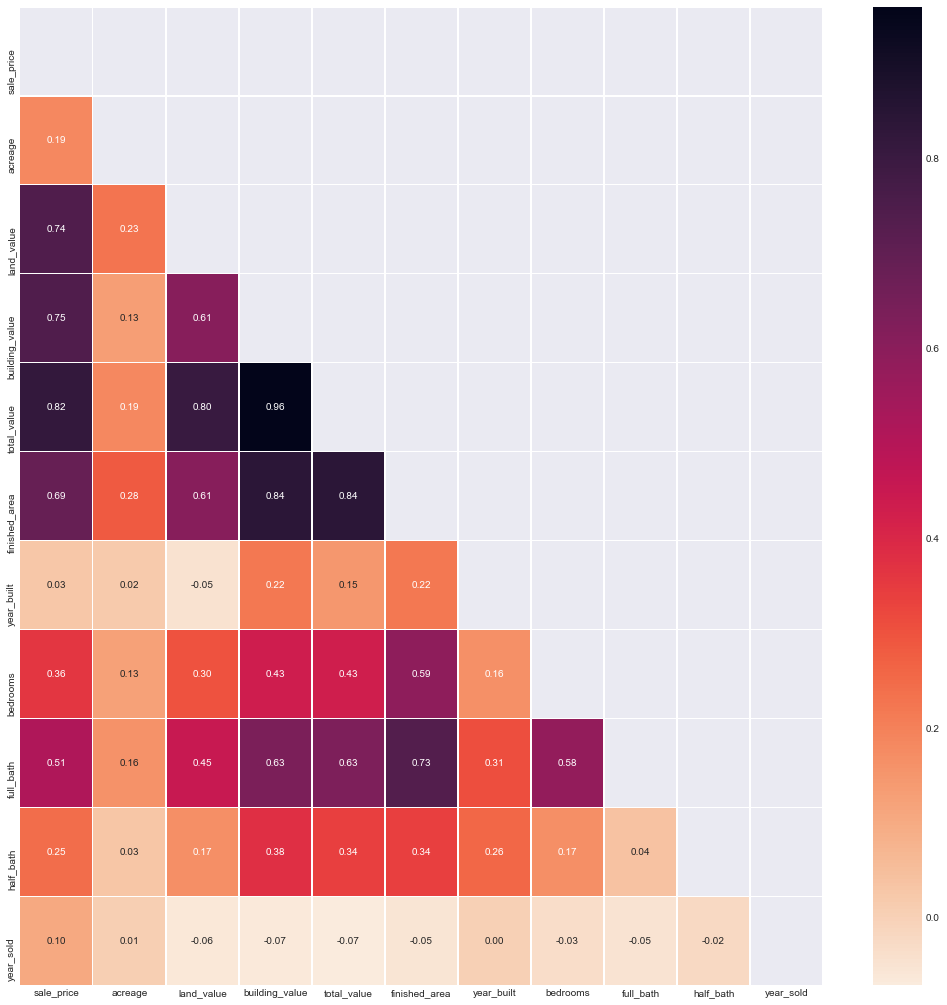

In [30]:
#housing_num = housing_dummy[['sale_price','acreage','land_value','building_value','total_value','finished_area','year_built','bedrooms','full_bath','half_bath','year_sold']]

corr = housing_clean.corr()
fig, ax = plt.subplots(figsize=(18, 18))
dropvals = np.zeros_like(corr)
dropvals[np.triu_indices_from(dropvals)] = True
sns.heatmap(corr, cmap = 'rocket_r', linewidths = .5, annot = True, fmt = ".2f", mask = dropvals)
plt.show()

>**From the heatmap correlation matrix above, we can spot a couple of strong correlation varaibles with sale price, such as total value, buidling value, land value, and finish area. Number of full baths, bedrooms, acreage, and number of half bath had moderate correlation with the sale price. All other numerical factors like year built, year sold, whether vacant or multiple parcels when sold or not are not correlated with sale price.**

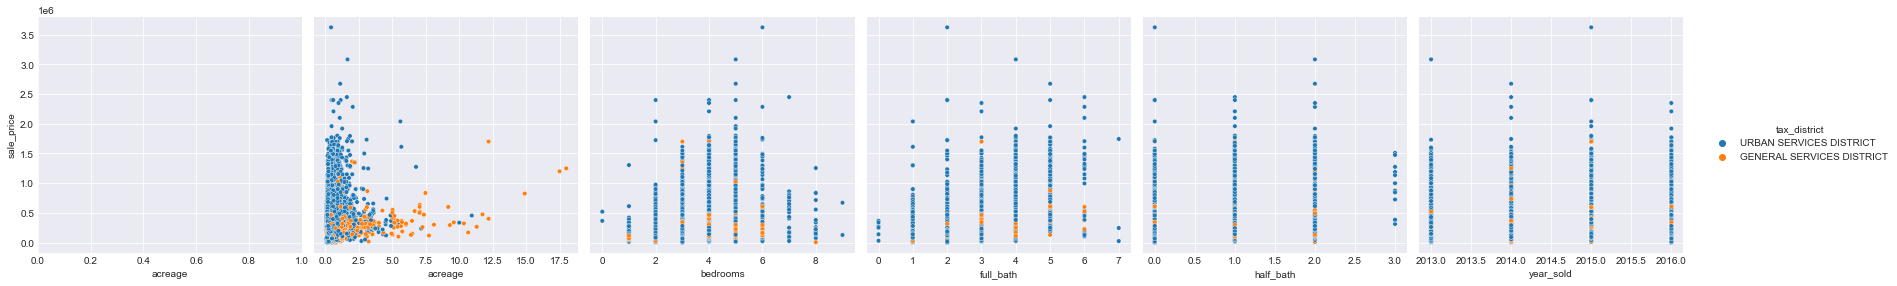

In [31]:
# explore correlationship between price and quantitative variables.
# color coded based on tax districts
sns.pairplot(housing_clean, hue='tax_district',
             x_vars=['acreage','acreage','bedrooms','full_bath','half_bath','year_sold'], 
             y_vars=['sale_price'], plot_kws={"s": 20}, height=4)

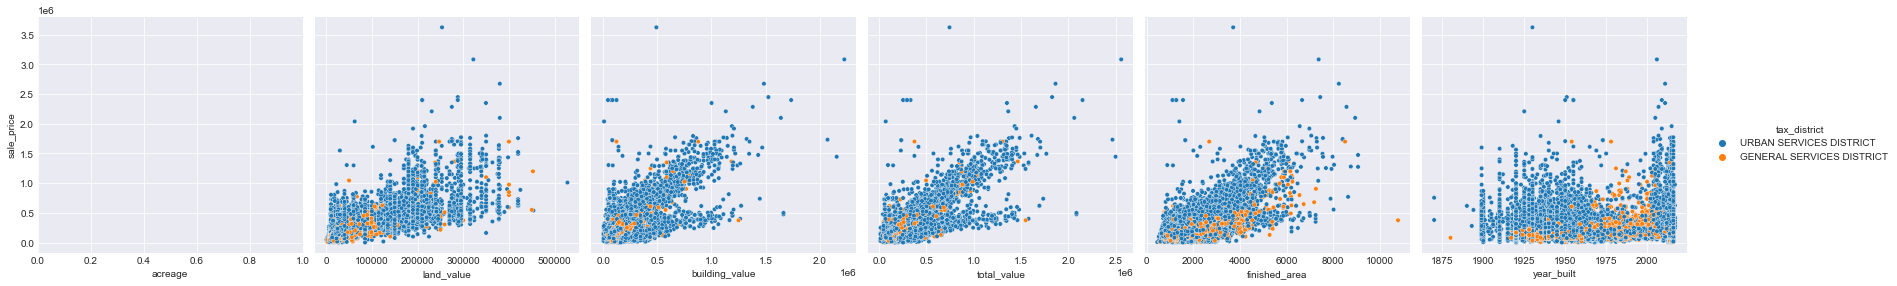

In [32]:
# explore correlationship between price and quantitative variables.
# color coded based on tax districts
sns.pairplot(housing_clean, hue='tax_district',
             x_vars=['acreage','land_value','building_value','total_value','finished_area','year_built'], 
             y_vars=['sale_price'], plot_kws={"s": 20}, height=4)

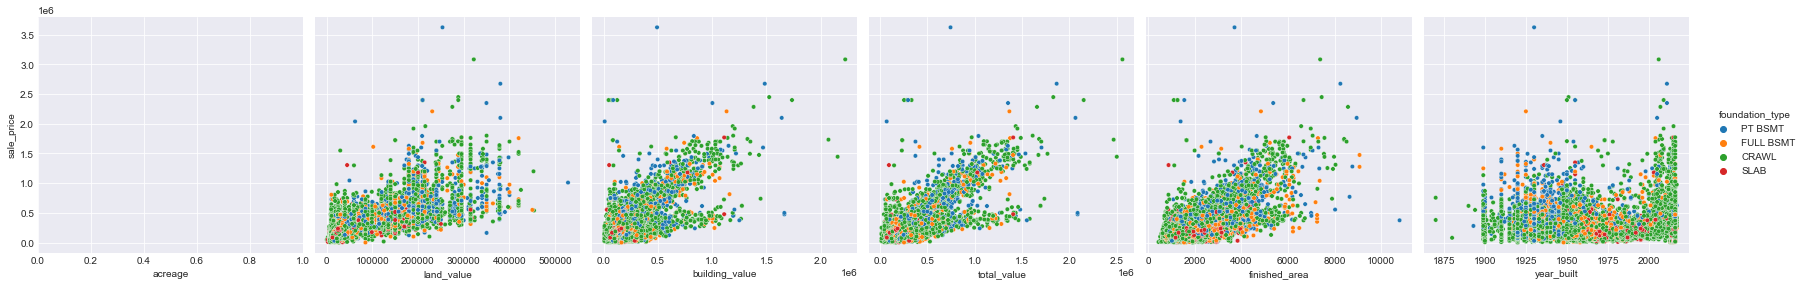

In [33]:
# explore correlationship between price and quantitative variables.
# color coded based on neighbourhood areas
sns.pairplot(housing_clean, hue='foundation_type',
             x_vars=['acreage','land_value','building_value','total_value','finished_area','year_built'], 
             y_vars=['sale_price'], plot_kws={"s": 20}, height=4)

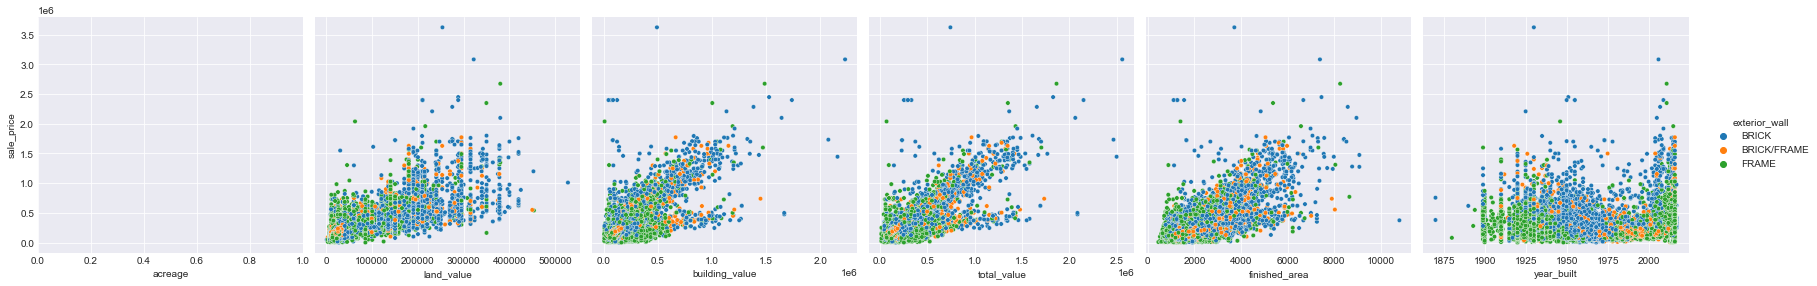

In [34]:
# explore correlationship between price and quantitative variables.
# color coded based on neighbourhood areas
sns.pairplot(housing_clean, hue='exterior_wall',
             x_vars=['acreage','land_value','building_value','total_value','finished_area','year_built'], 
             y_vars=['sale_price'], plot_kws={"s": 20}, height=4)

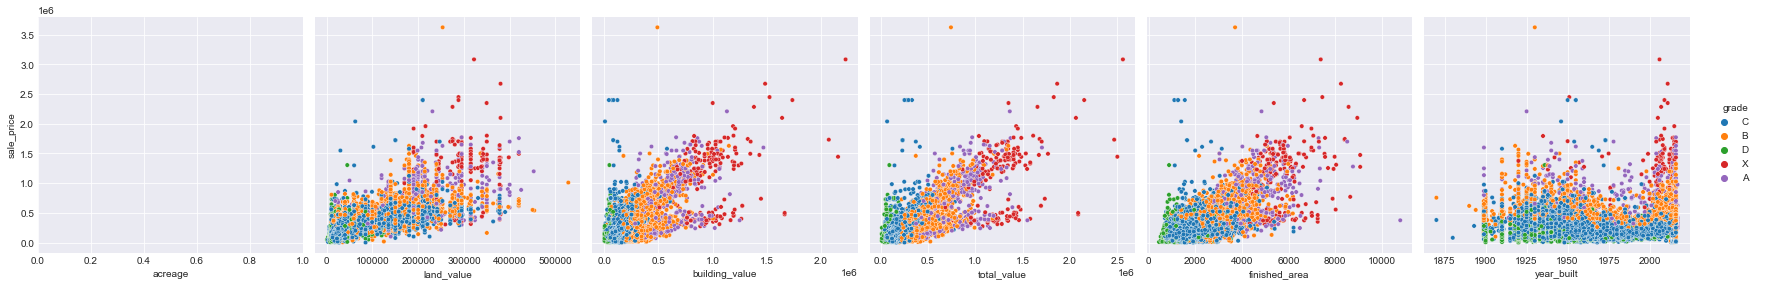

In [35]:
# explore correlationship between price and quantitative variables.
# color coded based on neighbourhood areas
sns.pairplot(housing_clean, hue='grade',
             x_vars=['acreage','land_value','building_value','total_value','finished_area','year_built'], 
             y_vars=['sale_price'], plot_kws={"s": 20}, height=4)

**A couple of things that I have observed:**

> 1) Acreage, number of bedrooms, number of full bath, half bath, or year sold don't have an obvious impact on the price.
>
> 2) Different tax district, foundation type, or exterior wall type don't seem like to have much impact on price neither.
>
> 3) Grades seems like is somewhat an affective attributes.
>
> 4) There are also some more outliers observed, I'm going to remove those before moving on to the next section.

In [36]:
filtered1 = housing_clean[housing_clean['acreage'] < 20]
filtered2 = filtered1[filtered1['full_bath'] < 8]
filtered3 = filtered2[filtered2['finished_area'] < 15000]
filtered4 = filtered3[filtered3['year_built'] > 1850]
filtered5 = filtered4[filtered4['sale_price'] < 4000000]


housing_clean = filtered5
housing_clean.describe()

,sale_price,acreage,land_value,building_value,total_value,finished_area,year_built,bedrooms,full_bath,half_bath,year_sold
count,2.190600e+04,21906.000000,21906.000000,2.190600e+04,2.190600e+04,21906.000000,21906.000000,21906.000000,21906.000000,21906.000000,21906.000000
mean,2.440950e+05,0.394996,55390.667488,1.566738e+05,2.143799e+05,1804.962550,1963.776180,3.056332,1.821373,0.276043,2014.560623
std,2.106404e+05,0.532725,65084.725908,1.386883e+05,1.877235e+05,882.175327,26.384623,0.813392,0.855078,0.473626,1.082365
min,1.000000e+02,0.040000,900.000000,1.600000e+03,1.260000e+04,450.000000,1870.000000,0.000000,0.000000,0.000000,2013.000000
25%,1.235000e+05,0.180000,21100.000000,8.270000e+04,1.081000e+05,1218.000000,1948.000000,3.000000,1.000000,0.000000,2014.000000
50%,1.799000e+05,0.260000,27500.000000,1.145500e+05,1.499000e+05,1596.000000,1960.000000,3.000000,2.000000,0.000000,2015.000000
75%,3.000000e+05,0.410000,47000.000000,1.805000e+05,2.579000e+05,2135.910002,1983.000000,3.000000,2.000000,1.000000,2015.000000
max,3.625000e+06,18.000000,528000.000000,2.228000e+06,2.559300e+06,10788.580080,2017.000000,9.000000,7.000000,3.000000,2016.000000


## Dummy Variables for Categorical Attributes

>**Therefore, next, we will drop the irrelavent arrtributes based on our findings.**

In [37]:
housing = housing_clean[['sale_price','acreage','land_value','building_value','total_value','finished_area','year_built','bedrooms','full_bath','half_bath','year_sold','tax_district','grade']]
#housing = housing_clean[['sale_price','land_value','building_value','total_value','finished_area','grade']]

# create dummy variables
housing = pd.get_dummies(housing)
housing

,sale_price,acreage,land_value,building_value,total_value,finished_area,year_built,bedrooms,full_bath,half_bath,year_sold,tax_district_GENERAL SERVICES DISTRICT,tax_district_URBAN SERVICES DISTRICT,grade_A,grade_B,grade_C,grade_D,grade_X
1,191500,0.17,32000.0,134400.0,168300.0,1149.00000,1941.0,2.0,1.0,0.0,2013,0,1,0,0,1,0,0
3,32000,0.17,25000.0,243700.0,268700.0,2145.60001,1948.0,4.0,2.0,0.0,2013,0,1,0,1,0,0,0
4,102000,0.34,25000.0,138100.0,164800.0,1969.00000,1910.0,2.0,1.0,0.0,2013,0,1,0,0,1,0,0
5,93736,0.17,25000.0,86100.0,113300.0,1037.00000,1945.0,2.0,1.0,0.0,2013,0,1,0,0,1,0,0
7,44000,0.20,16000.0,68100.0,84300.0,1216.00000,1932.0,2.0,1.0,0.0,2013,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56605,214000,0.27,25000.0,142400.0,167400.0,2421.00000,1996.0,3.0,3.0,0.0,2016,0,1,0,0,1,0,0
56607,236000,0.23,25000.0,159300.0,184300.0,3117.00000,1995.0,3.0,3.0,0.0,2016,0,1,0,0,1,0,0
56614,466000,0.15,40000.0,204100.0,256000.0,1637.00000,2004.0,3.0,2.0,1.0,2016,0,1,0,1,0,0,0
56615,685000,0.19,40000.0,295900.0,351600.0,2478.00000,2005.0,4.0,3.0,1.0,2016,0,1,0,1,0,0,0


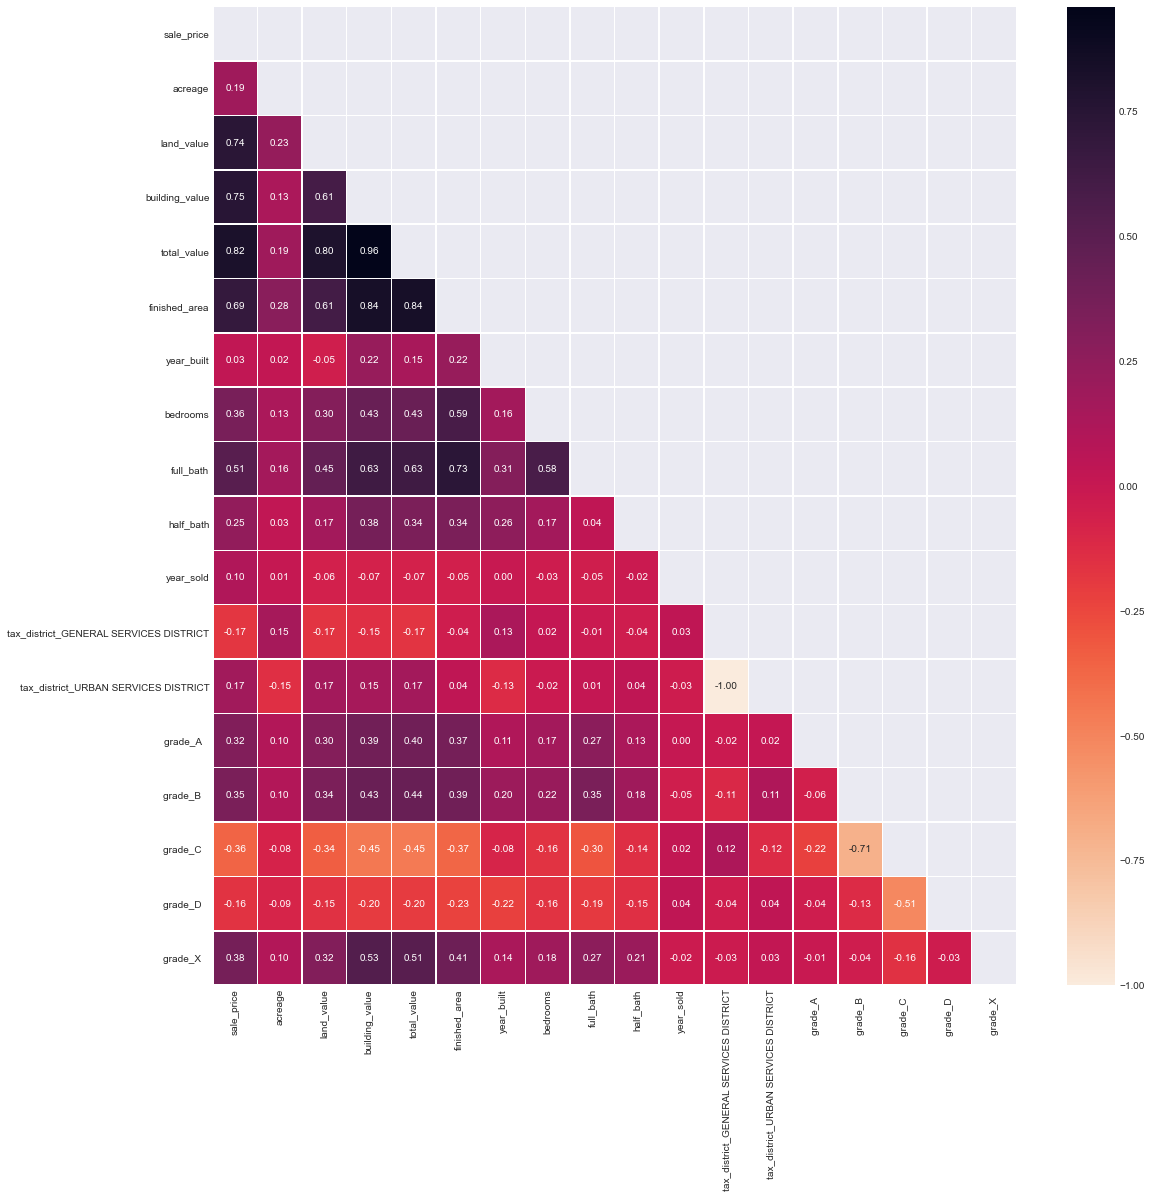

In [38]:
corr = housing.corr()
fig, ax = plt.subplots(figsize=(18, 18))
dropvals = np.zeros_like(corr)
dropvals[np.triu_indices_from(dropvals)] = True
sns.heatmap(corr, cmap = 'rocket_r', linewidths = .5, annot = True, fmt = ".2f", mask = dropvals)
plt.show()

>**Now this second heatmap correlation matrix above, shows a much reasonable correlation.**

# Part 2: Build Multi-Linear Regression Model

In [39]:
# set up numerical independent variables and predict target variables
y = housing[['sale_price']]
x = housing.drop(['sale_price'], axis = 'columns')

# split train and test sets
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=0)

In [40]:
# define linear regression function formula and fit model
OLS_model = sm.OLS(y_train,x_train).fit()
OLS_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             sale_price   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     3289.
Date:                Wed, 19 May 2021   Prob (F-statistic):               0.00
Time:                        11:25:06   Log-Likelihood:            -2.2775e+05
No. Observations:               17524   AIC:                         4.555e+05
Df Residuals:                   17508   BIC:                         4.557e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
acreage                                 4481.5031   1637.902      2.736      0.006    1271.053    7691.954
land_value                                -0.7999      0.133     -6.031      0.000      -1.060      -0.540
building_value                            -1.4669      0.133    -11.003      0.000      -1.728      -1.206
total_value                                2.1547      0.131     16.461      0.000       1.898       2.411
finished_area                              9.2439      2.245      4.117      0.000       4.843      13.645
year_built                              -510.9472     36.534    -13.985      0.000    -582.558    -439.336
bedrooms                                2495.8792   1313.862      1.900      0.057     -79.421    5071.180
full_bath                               5277.9317   1651.630      3.196      0.001    2040.572    8515.291
half_bath                               2710.8417   2080.188      1.303      0.193   -1366.534    6788.218
year_sold                               3.201e+04    747.363     42.827      0.000    3.05e+04    3.35e+04
tax_district_GENERAL SERVICES DISTRICT -4.535e+07   1.08e+06    -42.133      0.000   -4.75e+07   -4.32e+07
tax_district_URBAN SERVICES DISTRICT   -4.533e+07   1.08e+06    -42.120      0.000   -4.74e+07   -4.32e+07
grade_A                                -1.813e+07   4.31e+05    -42.091      0.000    -1.9e+07   -1.73e+07
grade_B                                -1.813e+07    4.3e+05    -42.110      0.000    -1.9e+07   -1.73e+07
grade_C                                -1.812e+07    4.3e+05    -42.097      0.000    -1.9e+07   -1.73e+07
grade_D                                -1.813e+07    4.3e+05    -42.109      0.000    -1.9e+07   -1.73e+07
grade_X                                -1.818e+07   4.31e+05    -42.206      0.000    -1.9e+07   -1.73e+07
==============================================================================
Omnibus:                     8270.870   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1002326.398
Skew:                           1.277   Prob(JB):                         0.00
Kurtosis:                      39.962   Cond. No.                     2.46e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.77e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

>**Here we figured out a couple of more less significant variables, acreage, number of bedrooms, and half baths, since their P-values are larger than 0.05. Therefore we are going to remove these before processsing.**

In [41]:
housing = housing.drop(['bedrooms','half_bath'
                        #,'year_sold','year_built','grade_X   ','grade_C   ','grade_D   ',
                        #'grade_A   ','tax_district_GENERAL SERVICES DISTRICT' , 'grade_B',full_bath'  '
                        ], axis = 'columns')

# set up numerical independent variables and predict target variables
y = housing[['sale_price']]
x = housing.drop(['sale_price'], axis = 'columns')

# split train and test sets
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=0)

# define linear regression function formula and fit model
OLS_model = sm.OLS(y_train,x_train).fit()
OLS_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             sale_price   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     3794.
Date:                Wed, 19 May 2021   Prob (F-statistic):               0.00
Time:                        11:25:06   Log-Likelihood:            -2.2775e+05
No. Observations:               17524   AIC:                         4.555e+05
Df Residuals:                   17510   BIC:                         4.556e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
acreage                                 4153.1797   1632.281      2.544      0.011     953.747    7352.613
land_value                                -0.8000      0.133     -6.031      0.000      -1.060      -0.540
building_value                            -1.4644      0.133    -10.986      0.000      -1.726      -1.203
total_value                                2.1526      0.131     16.444      0.000       1.896       2.409
finished_area                             11.3365      2.068      5.482      0.000       7.283      15.390
year_built                              -500.0453     35.216    -14.199      0.000    -569.073    -431.018
full_bath                               5191.1803   1446.266      3.589      0.000    2356.354    8026.006
year_sold                               3.201e+04    747.442     42.822      0.000    3.05e+04    3.35e+04
tax_district_GENERAL SERVICES DISTRICT -4.536e+07   1.08e+06    -42.142      0.000   -4.75e+07   -4.33e+07
tax_district_URBAN SERVICES DISTRICT   -4.535e+07   1.08e+06    -42.129      0.000   -4.75e+07   -4.32e+07
grade_A                                -1.814e+07   4.31e+05    -42.102      0.000    -1.9e+07   -1.73e+07
grade_B                                -1.813e+07    4.3e+05    -42.118      0.000    -1.9e+07   -1.73e+07
grade_C                                -1.812e+07    4.3e+05    -42.104      0.000    -1.9e+07   -1.73e+07
grade_D                                -1.813e+07    4.3e+05    -42.117      0.000    -1.9e+07   -1.73e+07
grade_X                                -1.819e+07   4.31e+05    -42.217      0.000    -1.9e+07   -1.73e+07
==============================================================================
Omnibus:                     8282.118   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1005605.178
Skew:                           1.280   Prob(JB):                         0.00
Kurtosis:                      40.023   Cond. No.                     2.51e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.63e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [78]:
# build and train a multilinear Regression Model on the training data set
linear_model = LinearRegression().fit(x_train, y_train)

# make predictions
y_linear_pred = linear_model.predict(x_test)


print('Coefficients:', linear_model.coef_)
print('Intercept:', linear_model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(y_test, y_linear_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(y_test, y_linear_pred))
print('Root Mean Squared Error: %.2f'
      % np.sqrt(metrics.mean_squared_error(y_test, y_linear_pred)))

Coefficients: [[ 4.15317973e+03 -7.99975312e-01 -1.46443725e+00  2.15264695e+00
   1.13365125e+01 -5.00045270e+02  5.19118025e+03  3.20070692e+04
  -8.41090691e+03  8.41090691e+03  5.59190371e+03  1.24911507e+04
   1.89987204e+04  1.10304618e+04 -4.81122366e+04]]
Intercept: [-63496033.5414721]
Mean squared error (MSE): 15242940945.03
Coefficient of determination (R^2): 0.68
Root Mean Squared Error: 123462.31


### Linear Regression Model Interpretation:
>
>**Important Features:**
>
> 1. Grade_X (negtively correlated)
>
> 2. Year sold
>
> 3. Grade_C
>
> **Mean squared error (MSE):** 15242940945.03
>
> **Coefficient of determination (R^2):** 0.68
>
> **Root Mean Squared Error:** 123462.31
>
> **Time:** 0.18 sec


# Part 3: Build Decision Tree Regression Model

In [81]:
# create model and fit
DTReg_model = DecisionTreeRegressor(criterion = 'mse', max_depth=5)
model_DTR = DTReg_model.fit(x_train,y_train)

# predicting values
y_DTR_pred = model_DTR.predict(x_test)

In [44]:
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(y_test, y_DTR_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(y_test, y_DTR_pred))
print('Root Mean Squared Error: %.2f'
      % np.sqrt(metrics.mean_squared_error(y_test, y_DTR_pred)))

Mean squared error (MSE): 14480978668.97
Coefficient of determination (R^2): 0.70
Root Mean Squared Error: 120336.94


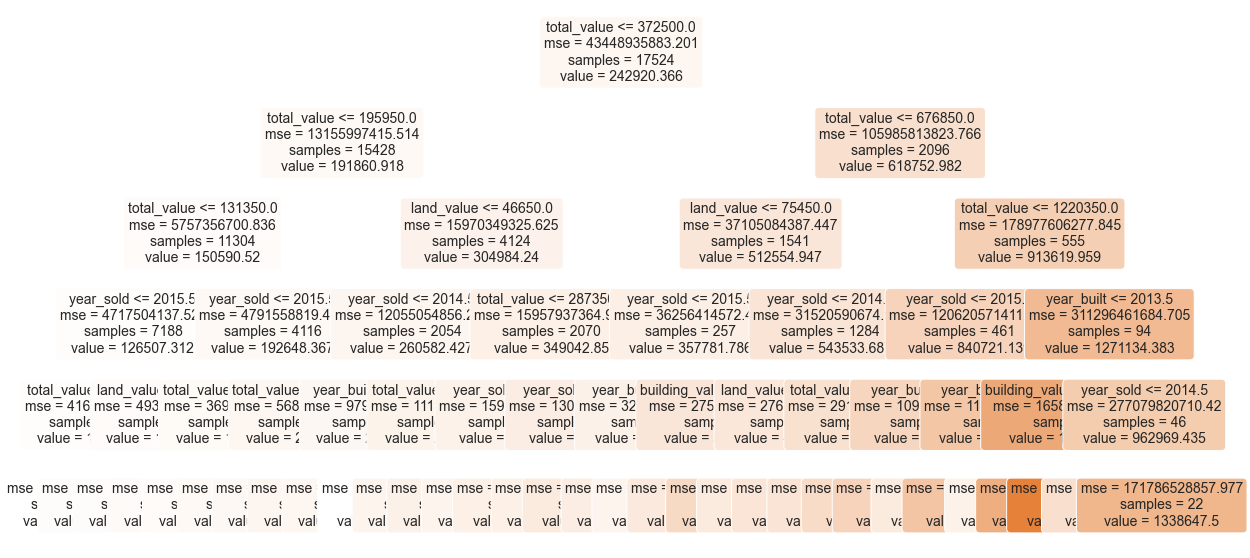

In [453]:
#data = tree.export_graphviz(DTReg_model, feature_names =list(x),class_names = sorted(y.unique()),filled=True)
#graphviz.Source(data)
plot = tree.plot_tree(DTReg_model,
               feature_names =x.columns.values.tolist(),filled=True,rounded=True,fontsize=14) 

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.03083
Feature: 2, Score: 0.00539
Feature: 3, Score: 0.88486
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.03171
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.04721
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000


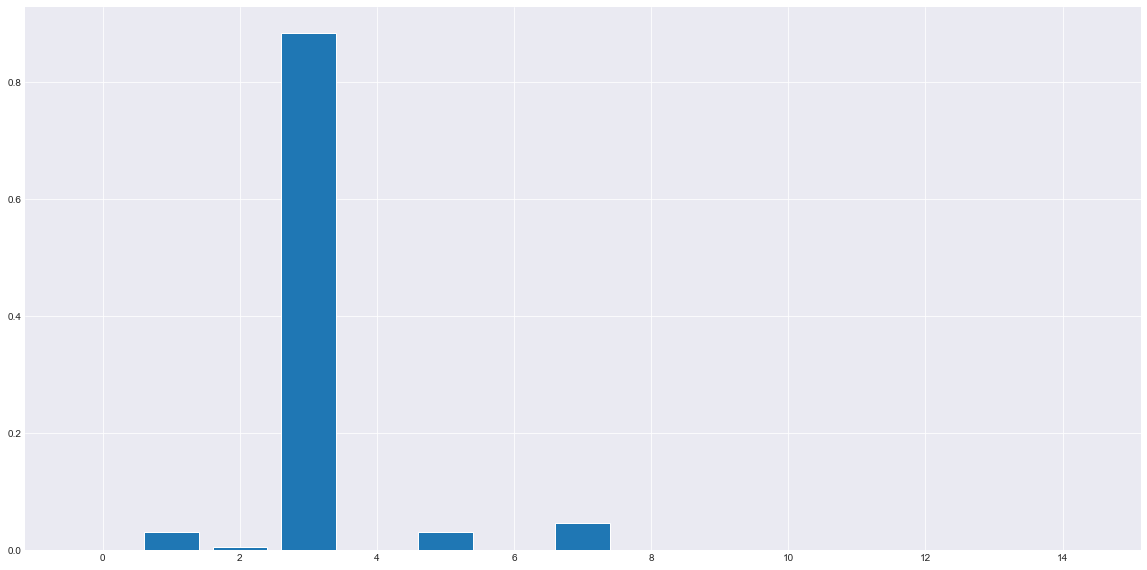

In [65]:
# get importance
importance = DTReg_model.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

### Decision Tree Regression Model Interpretation:
>
>**Important Features:**
>
> 1. Total Value
>
> 2. Year sold
>
> 3. Land Value
>
> **Mean squared error (MSE):** 14480978668.97
>
> **Coefficient of determination (R^2):** 0.7
>
> **Root Mean Squared Error:** 120336.94
>
> **Time:** 0.18 sec

### Model Comparison:
>
> Comparing to linear reg model, decision tree reg model values the important of features very differently, although the second important feature stays the same - year sold.


# Part 4: Build Random Forest Regression Model

In [84]:
# create regressor object
RF_model = RandomForestRegressor(n_estimators = 100, random_state = 0)

# fit the regressor with x and y data
RF_model.fit(x_train, y_train)  

# predicting values
y_RF_pred = RF_model.predict(x_test)

<ipython-input-84-cfd59d65a90e>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF_model.fit(x_train, y_train)


In [54]:
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(y_test, y_RF_pred))
print('Coefficient of de termination (R^2): %.2f'
      % r2_score(y_test, y_RF_pred))
print('Root Mean Squared Error: %.2f'
      % np.sqrt(metrics.mean_squared_error(y_test, y_RF_pred)))

Mean squared error (MSE): 11736257800.46
Coefficient of de termination (R^2): 0.76
Root Mean Squared Error: 108334.01


Feature: 0, Score: 0.02956
Feature: 1, Score: 0.04451
Feature: 2, Score: 0.04174
Feature: 3, Score: 0.71651
Feature: 4, Score: 0.03138
Feature: 5, Score: 0.06539
Feature: 6, Score: 0.00669
Feature: 7, Score: 0.05695
Feature: 8, Score: 0.00101
Feature: 9, Score: 0.00108
Feature: 10, Score: 0.00150
Feature: 11, Score: 0.00125
Feature: 12, Score: 0.00139
Feature: 13, Score: 0.00060
Feature: 14, Score: 0.00044


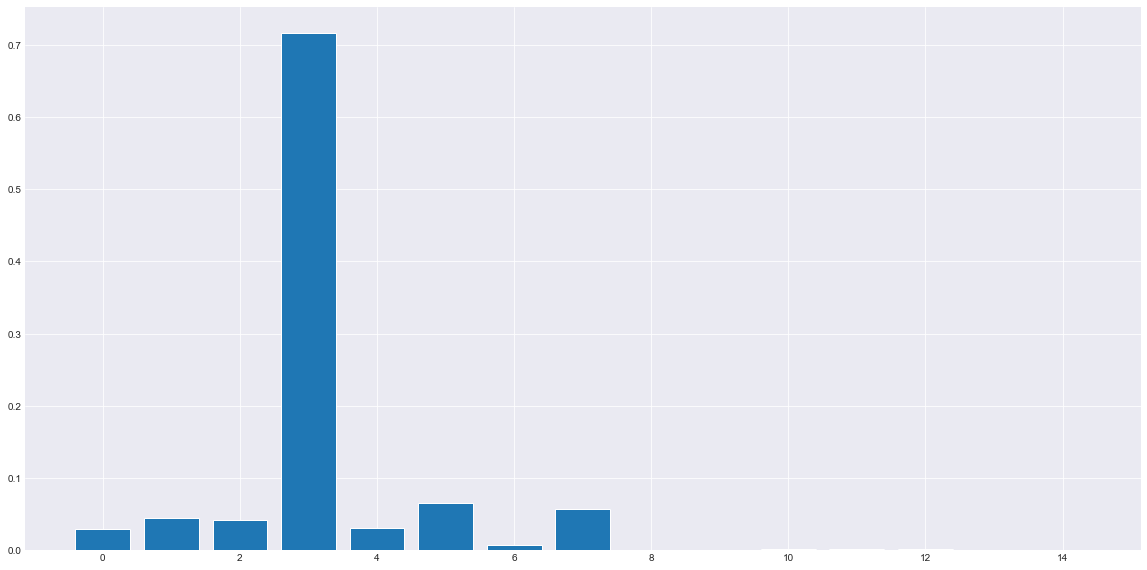

In [67]:
# get importance
importance = RF_model.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

### Ransom Forest Regression Model Interpretation:
>
>**Important Features:**
>
> 1. Total Value
>
> 2. Year Built
>
> 3. Year Sold
>
> **Mean squared error (MSE):** 11736257800.46
>
> **Coefficient of determination (R^2):** 0.76
>
> **Root Mean Squared Error:** 108334.01
>
> **Time:** 8.6 sec

### Model Comparison:
>
> Random forest model values the important of features diffferent from linear reg model, but quite similar to decision tree reg model. Two out of the top three key features are the same.


# Part 5: Build Gradient Boost Model

In [87]:
# create regressor object
GB_model = ensemble.GradientBoostingRegressor(n_estimators = 100, random_state = 0)
GB_model.fit(x_train, y_train)

# predicting values
y_GB_pred = GB_model.predict(x_test)

C:\Users\Lu_ki\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [59]:
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(y_test, y_GB_pred))
print('Coefficient of de termination (R^2): %.2f'
      % r2_score(y_test, y_GB_pred))
print('Root Mean Squared Error: %.2f'
      % np.sqrt(metrics.mean_squared_error(y_test, y_GB_pred)))

Mean squared error (MSE): 12184078030.64
Coefficient of de termination (R^2): 0.75
Root Mean Squared Error: 110381.51


Feature: 0, Score: 0.00549
Feature: 1, Score: 0.21611
Feature: 2, Score: 0.01858
Feature: 3, Score: 0.64006
Feature: 4, Score: 0.00758
Feature: 5, Score: 0.04356
Feature: 6, Score: 0.00115
Feature: 7, Score: 0.06424
Feature: 8, Score: 0.00106
Feature: 9, Score: 0.00161
Feature: 10, Score: 0.00007
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00049


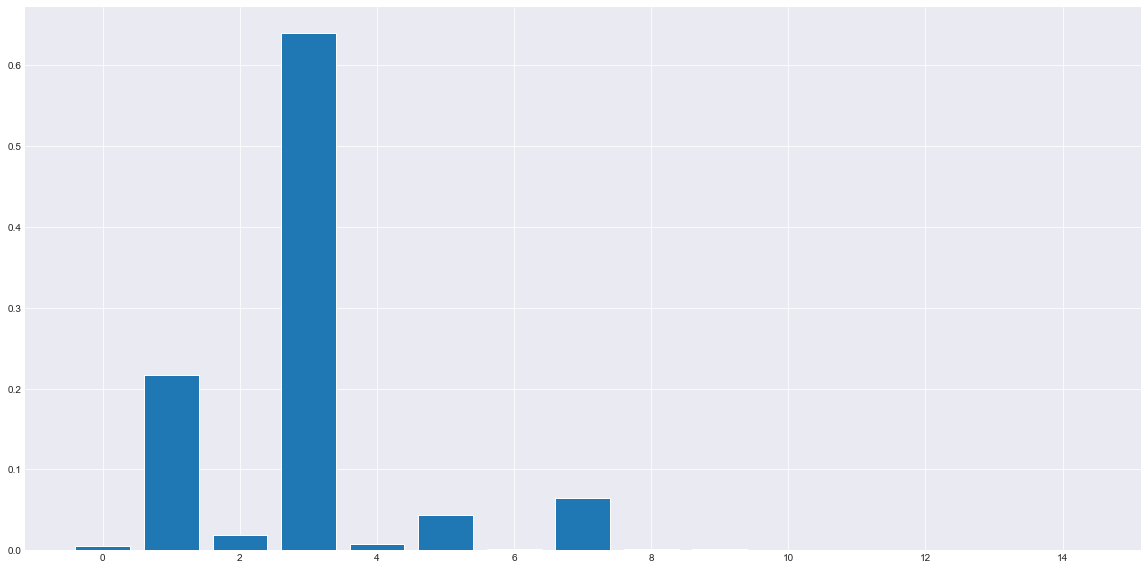

In [68]:
# get importance
importance = GB_model.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

### Gradient Boost Regression Model Interpretation:
>
>**Important Features:**
>
> 1. Total Value
>
> 2. Land Value
>
> 3. Year Sold
>
> **Mean squared error (MSE):** 12184078030.64
>
> **Coefficient of determination (R^2):** 0.75
>
> **Root Mean Squared Error:** 110381.51
>
> **Time:** 2.45 sec

### Model Comparison:
>
> Gradient boost model values the important of features pretty simmilar to  a combination of decision tree and random forest. All three top key features are the same with results from decision tree expect order and significance are slightly different. Other than that, the rest of features are valued similart to results from random forest.


# Part 6: Model Benchmarks Comparision

**Benchmarking is a crucial step in the model building process. There are three benchmarks to compare between models. They are:**
* **Accuracy** 

* **Fit**

* **Speed**


**From the model results above, we can conclude each model with the following measurements of these three benchmarks:**

>**Linear Regression Model**
>
> * **Accuracy:**  68%
>
>
> * **Fit (RMSE):**  123462.31
>
>
> * **Speed:**  0.18 sec
>

>
>**Decision Tree Regression Model**
>
> * **Accuracy:**  70%
>
>
> * **Fit (RMSE):**  120336.94
>
>
> * **Speed:**  0.18 sec
>

>
>**Random Forest Regression Model**
>
> * **Accuracy:**  76%
>
>
> * **Fit (RMSE):**  108334.01
>
>
> * **Speed:**  8.6 sec
>

>
>**Gradient Boost Regression Model**
>
> * **Accuracy:**  75%
>
>
> * **Fit (RMSE):**  110381.51
>
>
> * **Speed:**  2.45 sec

After reviewing the benchmark comparison of the models above, we can easily evaluate models with different pros and cons. Linear regression being the least accurate but fastest model, and random forest being the slowest model but model accurate, each has there drawback and are not the best model to use for this case.

Decision tree, on the other hand, takes almost the same time as linear regression, but slightly more accurate. Gradient Boost, though, takes some amount of time in between the fastest and slowest model (but closer to the faster end), but it's accuracy is almost as high as the top accurate model available. Therefore, these two models both have a reason to be implemented depending on the main purpose/focus of the model. If it is for cases that we need instant results, then I would sugguest decision tree model. Otherwise, if we just need a more accurate model for decision making but not on a pressure of time, then Gradient Boost is definitely the most appropriate model to use. 

In this case, since our company is looking for making huge investment in the real estate in Nashville, we would want the result to be as accurate and possible. Plus we still have a week to build and run the model, which is plenty of time. Thus, I would definitely suggest our company to implement the **Gradient Boost Regression model** in this case.